## Imports

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

## Load Data

In [2]:
iris = load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [3]:
iris_data = iris['data']
iris_target = iris['target']

In [4]:
np.unique(iris_target)

array([0, 1, 2])

In [5]:
dict(enumerate(iris['target_names']))

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [6]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [8]:
iris_df['target'] = iris_target

In [9]:
iris_df['target_name'] = iris_df['target'].map(dict(enumerate(iris['target_names'])))

In [10]:
iris_df['target_name'] = iris_df['target_name'].astype('category')

In [11]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Plot

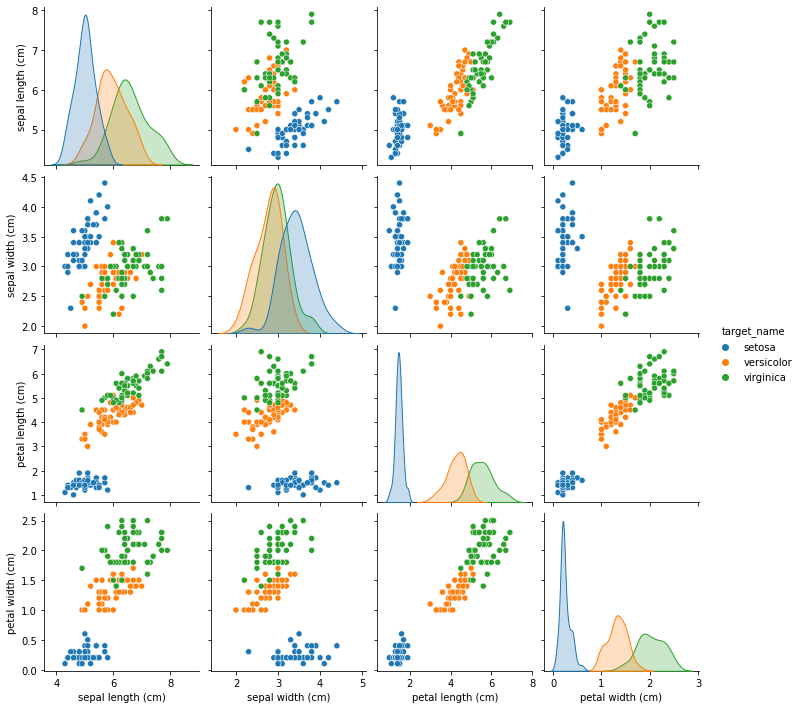

In [12]:
sns.pairplot(iris_df, vars=iris['feature_names'], hue='target_name')
plt.show()

## Binary Classification

In [13]:
bin_iris_df = iris_df[iris_df['target_name'] != 'setosa']

In [14]:
response = 'target'
predictors = ['petal width (cm)', 'petal length (cm)']

X = bin_iris_df[predictors].values
y = (bin_iris_df[response] == 2).astype(np.int32)

In [15]:
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

C:\Users\Lasha_Pertakhia\AppData\Local\Temp\ipykernel_28744\1108394637.py:22: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


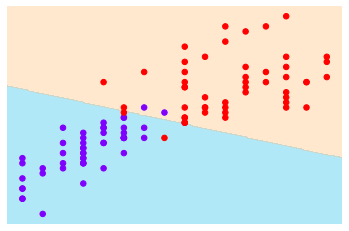

In [16]:
# from https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

visualize_classifier(log_reg, X, y)

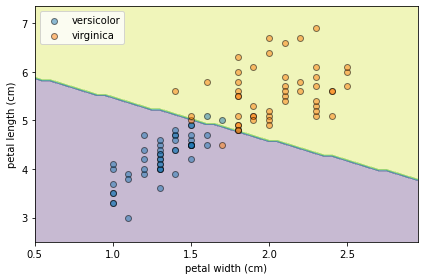

In [17]:
xlabel, ylabel = predictors
res = 0.05

def get_range(x):
    return x.min() - 0.5, x.max() + 0.5

# get the decision surface
x1_min, x1_max = get_range(X[:, 0])
x2_min, x2_max = get_range(X[:, 1])
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, res), np.arange(x2_min, x2_max, res))

# predict the decision surface
Z = log_reg.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

# plot the decision surface
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3)

# plot data
plt.scatter(x=X[y==0, 0],y=X[y==0, 1], alpha=0.5, label='versicolor', edgecolor='black')
plt.scatter(x=X[y==1, 0],y=X[y==1, 1], alpha=0.5, label='virginica', edgecolor='black')

# 
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

plt.xlabel(xlabel)
plt.ylabel(ylabel)
   
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

In [18]:
y_pred = log_reg.predict(X)

### Confusion Matrix

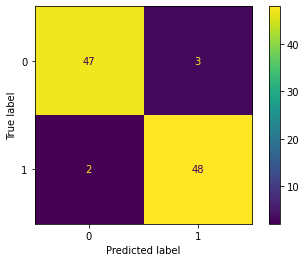

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
cm = confusion_matrix(y, y_pred, labels=log_reg.classes_)
# cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()
plt.show()

In [20]:
tn, fp, fn, tp = cm.ravel()

In [21]:
precision_score(y, y_pred), tp / (fp + tp)

(0.9411764705882353, 0.9411764705882353)

In [22]:
recall_score(y, y_pred), tp / (fn + tp)

(0.96, 0.96)

In [23]:
f1_score(y, y_pred), tp / (tp + (fn + fp) / 2)

(0.9504950495049505, 0.9504950495049505)

In [24]:
print(classification_report(y, y_pred, labels=log_reg.classes_))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        50
           1       0.94      0.96      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



### ROC Curve

#### Probabilities

In [25]:
y_prob = log_reg.predict_proba(X)

In [26]:
y_prob[:,1]

array([0.23985297, 0.18687808, 0.41109257, 0.0343487 , 0.23277976,
       0.12482393, 0.33706762, 0.00248229, 0.15845386, 0.0330721 ,
       0.00431815, 0.09082069, 0.01709237, 0.23985297, 0.0115756 ,
       0.1206047 , 0.18687808, 0.02244165, 0.18687808, 0.01644619,
       0.51960254, 0.0343487 , 0.41109257, 0.16375064, 0.07564758,
       0.1206047 , 0.29406087, 0.59757937, 0.18687808, 0.00431815,
       0.01250773, 0.00750157, 0.02078479, 0.60696789, 0.18687808,
       0.22585317, 0.28599051, 0.09750456, 0.04485213, 0.0343487 ,
       0.07843431, 0.19290722, 0.02725761, 0.00248229, 0.05837324,
       0.04656156, 0.05837324, 0.07564758, 0.0013711 , 0.04485213,
       0.99382597, 0.75955275, 0.97914883, 0.90891003, 0.97833339,
       0.99696189, 0.27025517, 0.98586134, 0.94562211, 0.99531621,
       0.80039696, 0.84627981, 0.93924913, 0.75232177, 0.9123738 ,
       0.93461909, 0.88315526, 0.99818485, 0.9991787 , 0.47958459,
       0.97748679, 0.69705017, 0.99707833, 0.58811877, 0.96421

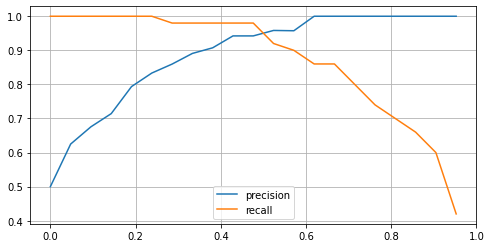

In [27]:
prob_thresholds = np.linspace(0, 1, 21, endpoint=False)
precisions = []
recalls = []

for prob_thresh in prob_thresholds:
    y_hat = (y_prob[:, 1] >= prob_thresh).astype(np.int32)
    precision, recall = precision_score(y, y_hat), recall_score(y, y_hat)
    precisions.append(precision)
    recalls.append(recall)
    
plt.figure(figsize=(8, 4))
plt.plot(prob_thresholds, precisions, label='precision')
plt.plot(prob_thresholds, recalls, label='recall')
plt.grid(True)
plt.legend()
plt.show()

#### Scores

$ z = \beta_{0} + \Sigma \beta_{i}X_{i}   $

In [28]:
y_scores = log_reg.decision_function(X)

In [29]:
y_scores

array([-1.15348575, -1.47042463, -0.35945058, -3.33623848, -1.19268111,
       -1.94752092, -0.67638945, -5.99608751, -1.66977741, -3.37543385,
       -5.44060049, -2.30365516, -4.05188293, -1.15348575, -4.44721253,
       -1.98671629, -1.47042463, -3.77413942, -1.47042463, -4.09107829,
        0.07845036, -3.33623848, -0.35945058, -1.63058205, -2.50300795,
       -1.98671629, -0.87574224,  0.39538923, -1.47042463, -5.44060049,
       -4.36882181, -4.88511347, -3.85253014,  0.4345846 , -1.47042463,
       -1.23187648, -0.9149376 , -2.22526443, -3.05849497, -3.33623848,
       -2.46381258, -1.43122926, -3.57478663, -5.99608751, -2.78075146,
       -3.01929961, -2.78075146, -2.50300795, -6.5907699 , -3.05849497,
        5.08120955,  1.15022904,  3.84927344,  2.30039845,  3.81007807,
        5.79347802, -0.99332833,  4.24460304,  2.85588548,  5.35895306,
        1.38877719,  1.70571607,  2.73829939,  1.11103368,  2.34296979,
        2.65990866,  2.02265494,  6.30976968,  7.10380486, -0.08

In [30]:
1 / (1+np.exp(-y_scores))

array([0.23985297, 0.18687808, 0.41109257, 0.0343487 , 0.23277976,
       0.12482393, 0.33706762, 0.00248229, 0.15845386, 0.0330721 ,
       0.00431815, 0.09082069, 0.01709237, 0.23985297, 0.0115756 ,
       0.1206047 , 0.18687808, 0.02244165, 0.18687808, 0.01644619,
       0.51960254, 0.0343487 , 0.41109257, 0.16375064, 0.07564758,
       0.1206047 , 0.29406087, 0.59757937, 0.18687808, 0.00431815,
       0.01250773, 0.00750157, 0.02078479, 0.60696789, 0.18687808,
       0.22585317, 0.28599051, 0.09750456, 0.04485213, 0.0343487 ,
       0.07843431, 0.19290722, 0.02725761, 0.00248229, 0.05837324,
       0.04656156, 0.05837324, 0.07564758, 0.0013711 , 0.04485213,
       0.99382597, 0.75955275, 0.97914883, 0.90891003, 0.97833339,
       0.99696189, 0.27025517, 0.98586134, 0.94562211, 0.99531621,
       0.80039696, 0.84627981, 0.93924913, 0.75232177, 0.9123738 ,
       0.93461909, 0.88315526, 0.99818485, 0.9991787 , 0.47958459,
       0.97748679, 0.69705017, 0.99707833, 0.58811877, 0.96421

#### Precision vs Recall

In [31]:
precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

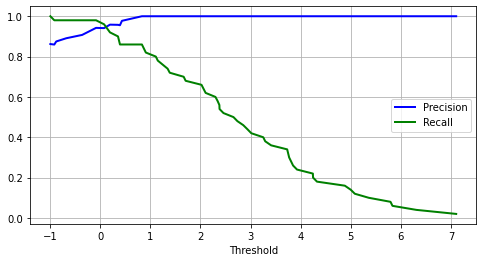

In [32]:
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.legend(loc="center right")
plt.xlabel("Threshold")
plt.grid(True)
plt.show()

#### FPR vs TPR

In [33]:
fpr, tpr, thresholds = roc_curve(y, y_scores)

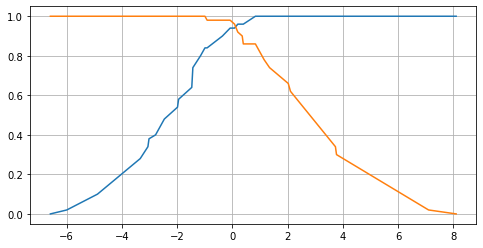

In [34]:
plt.figure(figsize=(8, 4))
plt.plot(thresholds, 1-fpr, label='False Positive Rate')
plt.plot(thresholds, tpr, label='True Positive Rate')
plt.grid(True)
plt.show()

#### ROC Plot

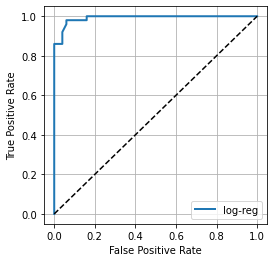

In [35]:
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, linewidth=2, label='log-reg')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

In [36]:
roc_auc_score(y, y_scores)

0.9912

### Manual

In [37]:
log_reg.coef_.shape

(1, 2)

In [38]:
# [100 x 2] * [2 x 1] = [100 x 1]

In [39]:
y_scores = log_reg.intercept_ + np.dot(X, log_reg.coef_.reshape(-1,1))
# y_scores

#### probability

$ p(z) = \frac{1}{1+e^{-z}} $

In [40]:
y_probs = 1 / (1+np.exp(-y_scores))

In [41]:
y_pred = (y_probs > 0.5).astype(np.int32)

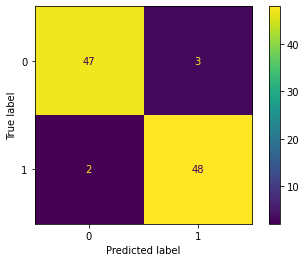

In [42]:
cm = confusion_matrix(y, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()
plt.show()

## Comparison

In [43]:
models = {
    'petal_width': ['petal width (cm)'],
    'petal_length': ['petal length (cm)'],
    'petal': ['petal length (cm)', 'petal width (cm)'],
    'sepal': ['sepal length (cm)', 'sepal width (cm)'],
    'full': ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
}

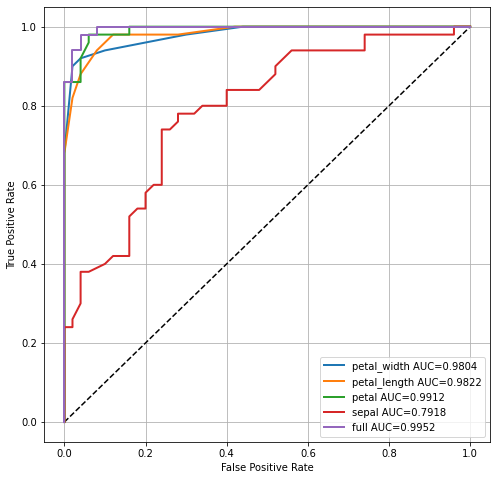

In [44]:
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')

for name, predictors in models.items():
    X = bin_iris_df[predictors]
    y = (bin_iris_df[response] == 2).astype(np.int32)
    # model
    log_reg = LogisticRegression(solver="lbfgs", random_state=42)
    log_reg.fit(X, y)
    # scores
    y_scores = log_reg.decision_function(X)
    # roc
    fpr, tpr, thresholds = roc_curve(y, y_scores)
    # auc
    roc_auc = roc_auc_score(y, y_scores)
    label = f'{name} AUC={roc_auc:.4}'
    # plot
    plt.plot(fpr, tpr, linewidth=2, label=label)
    # 

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

## Multiple Classification

In [45]:
response = 'target'
predictors = ['petal width (cm)', 'petal length (cm)']

X = iris_df[predictors].values
y = iris_df[response]

In [46]:
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

In [47]:
y_pred = log_reg.predict(X)

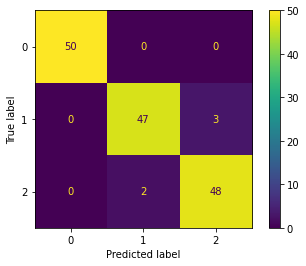

In [48]:
cm = confusion_matrix(y, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()
plt.show()

In [49]:
print(classification_report(y, y_pred, labels=log_reg.classes_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

